a)

Text(0.5, 1.0, 'Singular Values')

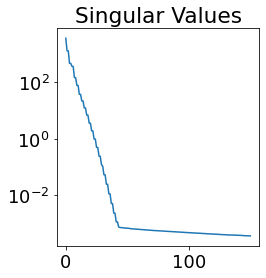

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.io
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

mat_contents = scipy.io.loadmat(os.path.join('DATA','VORTALL.mat'))
flows = np.array(mat_contents['VORTALL'])
n,m=flows.shape

U, S, VT = np.linalg.svd(flows,full_matrices=0)

fig = plt.figure(figsize=(8, 4))
gs = plt.GridSpec(nrows=1, ncols=2)

ax1=fig.add_subplot(gs[0,0])
ax1.semilogy(S)
ax1.set_title('Singular Values')

b)

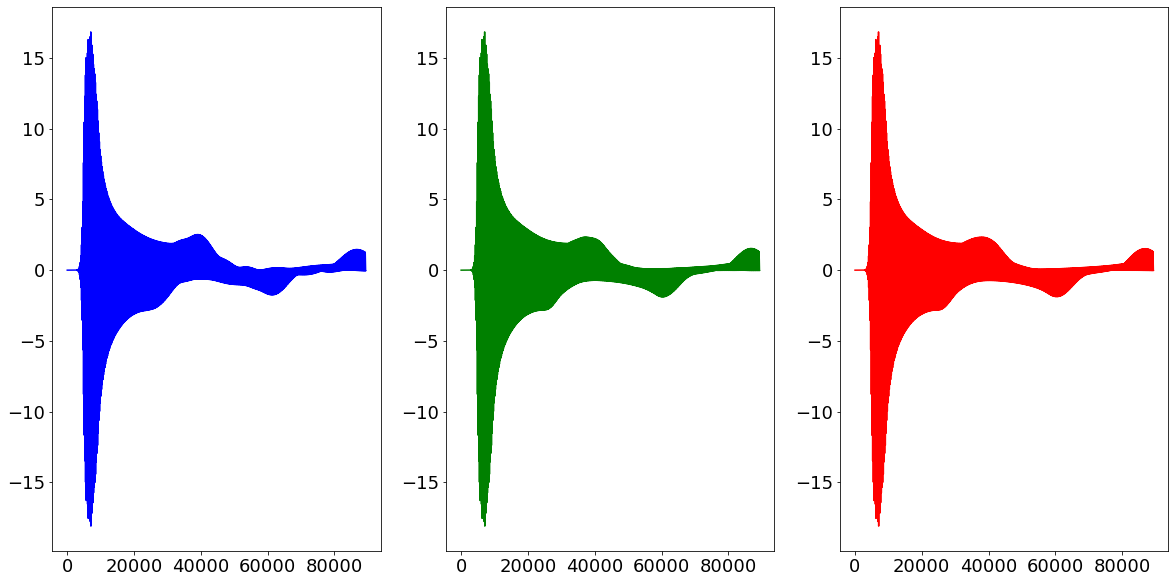

In [3]:
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy
r99 = np.min(np.where(cdS > 0.99))
r999=np.min(np.where(cdS > 0.999))

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
X99 = U[:,:(r99+1)] @ np.diag(S[:(r99+1)]) @ VT[:(r99+1),:]
X999 = U[:,:(r999+1)] @ np.diag(S[:(r999+1)]) @ VT[:(r999+1),:]

fig = plt.figure(figsize=(20, 10))
gs = plt.GridSpec(nrows=1, ncols=3)
ax2=fig.add_subplot(gs[0,0])
ax3=fig.add_subplot(gs[0,1])
ax4=fig.add_subplot(gs[0,2])

def animate(iter):
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax2.plot(X90[:,iter],'b')
    ax3.plot(X99[:,iter],'g')
    ax4.plot(X999[:,iter],'r')

anim = animation.FuncAnimation(fig,animate,frames=m,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())

c)

Text(0.5, 1.0, '~Uw_k')

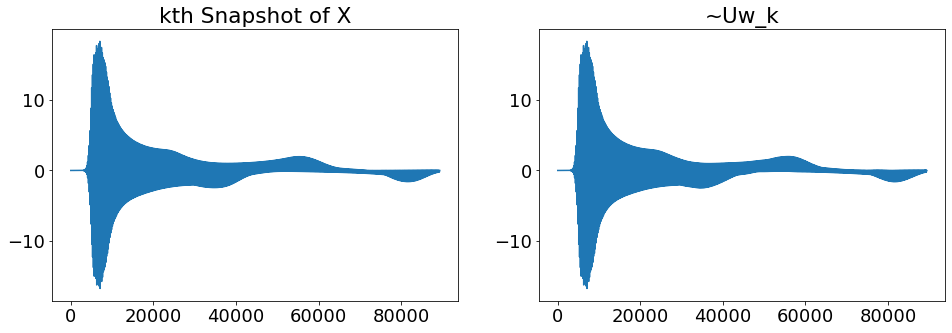

In [95]:
X10 = U[:,:10] @ np.diag(S[:10]) @ VT[:10,:]

#for column k=11
k=11
W= np.diag(S[:10]) @ VT[:10,:]

fig = plt.figure(figsize=(16, 5))
gs = plt.GridSpec(nrows=1, ncols=2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])

ax1.plot(flows[:,k])
ax1.set_title('kth Snapshot of X')
ax2.plot(U[:,:10] @ W[:,k])
ax2.set_title('~Uw_k')

d)

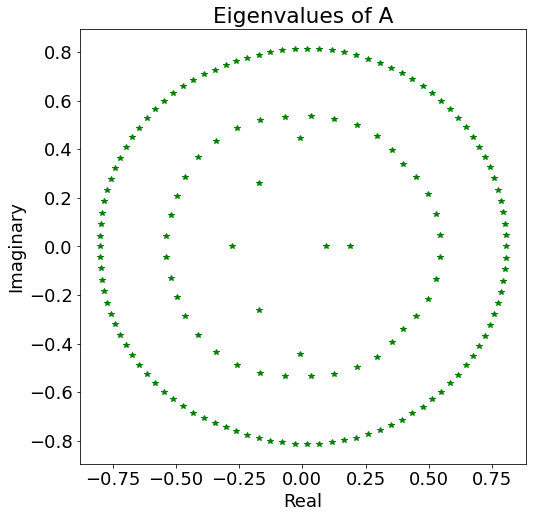

In [57]:
W=np.diag(S[:m-1]) @ VT[:m-1,:]
W_prm=np.diag(S[1:m]) @ VT[1:m,:]

u, s, vt = np.linalg.svd(W,full_matrices=0)
W_inv=vt.transpose() @ np.linalg.inv(np.diag(s)) @ u.transpose()
A=W_inv @ W_prm

v=np.linalg.eigvals(A)

x=v.real
y=v.imag
plt.plot(x, y,'g*')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Eigenvalues of A')
plt.show()

e)

In [126]:
W= np.diag(S) @ VT
w=np.zeros([151,151])
w[:,0]=np.multiply(np.diag(S)[0,0],VT[0,:])

for i in range(1,m):
    #w[i,:]=np.multiply(S[i],VT[i,:])
    w[:,i] = np.transpose(A)@w[:,i-1]

w=np.transpose(w)

In [127]:
def animate(iter):
    ax1.clear()
    ax2.clear()
    ax1.plot(flows[:,iter],'g')
    ax2.plot(U@w[:,iter],'r')

anim = animation.FuncAnimation(fig,animate,frames=m,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())